<a href="https://colab.research.google.com/github/hibnu-putra/pembelajaran-mesin/blob/main/Repo-3/dataanalysisexperimentknn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install kaggle

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"hibnu05","key":"98b59e9c6d4686ee9c2e4ce2397249a1"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d mahmoudelhemaly/students-grading-dataset

Dataset URL: https://www.kaggle.com/datasets/mahmoudelhemaly/students-grading-dataset
License(s): other
  0% 0.00/997k [00:00<?, ?B/s]
100% 997k/997k [00:00<00:00, 616MB/s]


In [ ]:
import zipfile

with zipfile.ZipFile("students-grading-dataset.zip", 'r') as zip_ref:
    zip_ref.extractall("students_grading_dataset")

In [ ]:
import os
os.listdir("students_grading_dataset")

['Students_Grading_Dataset_Biased.json',
 'Students_Grading_Dataset_Biased.csv',
 'metadata.xlsx',
 'Students Performance Dataset.json',
 'Students Performance Dataset.csv']

In [ ]:
import pandas as pd

In [ ]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [ ]:
df = pd.read_csv("students_grading_dataset/Students_Grading_Dataset_Biased.csv")
df.head()

,Student_ID,First_Name,Last_Name,Email,Gender,Age,Department,Attendance (%),Midterm_Score,Final_Score,...,Projects_Score,Total_Score,Grade,Study_Hours_per_Week,Extracurricular_Activities,Internet_Access_at_Home,Parent_Education_Level,Family_Income_Level,Stress_Level (1-10),Sleep_Hours_per_Night
0,S1000,Omar,Williams,student0@university.com,Female,22,Engineering,52.29,55.03,57.82,...,85.90,56.09,F,6.2,No,Yes,High School,Medium,5,4.7
1,S1001,Maria,Brown,student1@university.com,Male,18,Engineering,97.27,97.23,45.80,...,55.65,50.64,A,19.0,No,Yes,NaN,Medium,4,9.0
2,S1002,Ahmed,Jones,student2@university.com,Male,24,Business,57.19,67.05,93.68,...,73.79,70.30,D,20.7,No,Yes,Master's,Low,6,6.2
3,S1003,Omar,Williams,student3@university.com,Female,24,Mathematics,95.15,47.79,80.63,...,92.12,61.63,A,24.8,Yes,Yes,High School,High,3,6.7
4,S1004,John,Smith,student4@university.com,Female,23,CS,54.18,46.59,78.89,...,68.42,66.13,F,15.4,Yes,Yes,High School,High,2,7.1


In [ ]:
# Pilih fitur numerik yang relevan
features = ['Attendance (%)', 'Midterm_Score', 'Final_Score', 'Projects_Score',
            'Study_Hours_per_Week', 'Stress_Level (1-10)', 'Sleep_Hours_per_Night']
X = df[features]

# Impute missing values with the mean
# This needs to be done before scaling
X = X.fillna(X.mean())

# Target
y = df['Grade']

# Encode label
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Normalisasi fitur
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.2, random_state=42)

In [ ]:
# KNN Classifier
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train, y_train)

# Prediksi
y_pred = model.predict(X_test)

In [ ]:
# Evaluasi
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

Classification Report:
              precision    recall  f1-score   support

           A       0.45      0.62      0.52       298
           B       0.22      0.21      0.21       180
           C       0.19      0.17      0.18       161
           D       0.26      0.23      0.25       176
           F       0.28      0.17      0.21       185

    accuracy                           0.32      1000
   macro avg       0.28      0.28      0.27      1000
weighted avg       0.30      0.32      0.31      1000



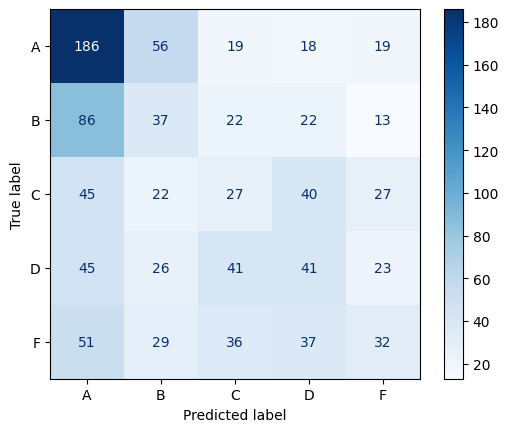

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, display_labels=label_encoder.classes_, cmap='Blues')